# Import Python Libraries
## Libraries Used
##### Pandas
Data manipulation and analysis
##### MatPlotLib Pyplot
2D plotting
##### Numpy
Supports large, multi-dimensional arrays and matrix manipulation and high level mathematical functions on these arrays
##### Scipy Stats
Hypothesis testing

In [1]:
# Perform library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### Import Data Dictionaries to Convert Codes to Descriptions

##### Sources

Non-Profit Data - NCSS Data Archive:  https://nccs-data.urban.org/dd2.php?close=1&form=BMF+08/2016

Region Data - https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

##### Non-Profit Method
* Created text files in json format within Visual Studio for each Data Dictionary
* Saved files to Resources folder
* Used pandas library to read the files into dataframes

In [2]:
# Import Level1 Data Dictionary and display : NOTE - This is only a break out of Public Charities
file_Level1 = "./Resources/NCSSDataDictLevel1.txt"
dict_Level1 = pd.read_json(file_Level1)
dict_Level1

,Description1
O,Other Nonprofits
PC,Public Charity
PF,Private Foundation
U,Unknown


In [3]:
# Import Region csv file
region_csv = './Resources/State_region.csv'
df_region = pd.read_csv(region_csv)
df_region

,STATE,REGION,STATE_POP,REGION_POP
0,AK,WEST,737438,77993663
1,AL,SOUTH,4887871,124753948
2,AR,SOUTH,3013825,124753948
3,AZ,WEST,7171646,77993663
4,CA,WEST,3955704,77993663
5,CO,WEST,5695564,77993663
6,CT,NORTHEAST,3572665,5611079
7,DE,SOUTH,967171,124753948
8,FL,SOUTH,21299325,124753948
9,GA,SOUTH,10519475,124753948


### Import IRS Business Master Files

##### Source
NCSS Data Archive
https://nccs-data.urban.org/data.php?ds=bmf

##### File
bmf.bm1812.csv

In [4]:
# specify file name
gov_data_file = "./Resources/2018_BMF.csv"

# import file
gov_data = pd.read_csv(gov_data_file, low_memory=False)

# Display resulting dataframe header
gov_data.head()

,EIN,SEC_NAME,FRCD,SUBSECCD,TAXPER,ASSETS,INCOME,NAME,ADDRESS,CITY,...,LEVEL4,LEVEL1,NTMAJ10,MAJGRPB,LEVEL3,LEVEL2,NTMAJ12,NTMAJ5,FILER,ZFILER
0,19818,3514,60,3,NaN,NaN,NaN,PALMER SECOND BAPTIST CHURCH,1050 THORNDIKE ST,PALMER,...,X,PC,RE,X,RE,O,RE,OT,N,N
1,29215,NaN,60,3,NaN,NaN,NaN,ST GEORGE CATHEDRAL,523 E BROADWAY,SOUTH BOSTON,...,X,PC,RE,X,RE,O,RE,OT,N,N
2,260049,NaN,60,3,NaN,NaN,NaN,CORINTH BAPTIST CHURCH,PO BOX 92,HOSFORD,...,X,PC,RE,X,RE,O,RE,OT,N,N
3,490336,NaN,60,3,NaN,NaN,NaN,EASTSIDE BAPTIST CHURCH,PO BOX 296,LABELLE,...,X,PC,RE,X,RE,O,RE,OT,N,N
4,587764,NaN,60,3,NaN,NaN,NaN,IGLESIA BETHESDA INC,157 ANDOVER ST,LOWELL,...,X,PC,RE,X,RE,O,RE,OT,N,N


# Data Cleaning Phase


In [5]:
gov_data.count()

EIN          1499450
SEC_NAME      404909
FRCD         1499450
SUBSECCD     1499450
TAXPER       1240366
ASSETS       1223112
INCOME       1223112
NAME         1499450
ADDRESS      1499450
CITY         1499450
STATE        1498426
NTEECONF        4518
NTEEFINAL    1499450
NAICS        1495191
ZIP5         1499353
OUTNCCS      1499450
OUTREAS         3021
RULEDATE     1499450
FIPS         1496643
FNDNCD       1499450
PMSA          506362
MSA_NECH     1175676
CASSETS       542418
CFINSRC       542418
CTAXPER       542418
CTOTREV       542418
ACCPER       1240366
RANDNUM      1499450
NTEECC       1499450
NTEE1        1499450
LEVEL4       1499450
LEVEL1       1499450
NTMAJ10      1499450
MAJGRPB      1499450
LEVEL3       1499450
LEVEL2       1499450
NTMAJ12      1499450
NTMAJ5       1499450
FILER        1499450
ZFILER       1499450
dtype: int64

In [6]:
# Select only the columns of data we need for analysis
gov_data = gov_data[["EIN", "CTOTREV", "CASSETS", "NAME", "CITY", "STATE", "NTMAJ10", "LEVEL1", "OUTNCCS"]]

In [7]:
# check the number of data rows per column
gov_data.count()

EIN        1499450
CTOTREV     542418
CASSETS     542418
NAME       1499450
CITY       1499450
STATE      1498426
NTMAJ10    1499450
LEVEL1     1499450
OUTNCCS    1499450
dtype: int64

In [8]:
# display the data read in
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN
...,...,...,...,...,...,...,...,...,...
1499445,996089401,NaN,NaN,TOYO SAKUMOTO CHARITABLE TR,HONOLULU,HI,PU,PF,IN
1499446,996165005,NaN,NaN,INDEPENDENT ORDER OF ODD FELLOWS,CUPERTINO,CA,MU,O,IN
1499447,998010224,NaN,NaN,HAWAII FOUNDATION FOR THE BLIND,HONOLULU,HI,HU,PF,IN
1499448,998997790,NaN,NaN,CHAMPAIGN COUNTY EXTENSION EDUCATION FOUNDATION,TAYLORVILLE,IL,ED,PC,IN


In [9]:
indexNames = gov_data[gov_data["OUTNCCS"]!="IN"].index
len(indexNames)

3021

In [10]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [11]:
gov_data.count()

EIN        1496429
CTOTREV     541062
CASSETS     541062
NAME       1496429
CITY       1496429
STATE      1496305
NTMAJ10    1496429
LEVEL1     1496429
OUTNCCS    1496429
dtype: int64

In [12]:
# identify the indices of rows we want to eliminate and display how many rows are found
indexNames = gov_data[gov_data["LEVEL1"]=="O"].index
len(indexNames)

348758

In [13]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [14]:
# identify the indices of rows we want to eliminate and display how many rows
indexNames = gov_data[gov_data["LEVEL1"]=="U"].index
len(indexNames)

30

In [15]:
# drop the rows identified and show the resulting dataframe
gov_data.drop(indexNames, inplace=True)
gov_data.head()

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
0,19818,NaN,NaN,PALMER SECOND BAPTIST CHURCH,PALMER,MA,RE,PC,IN
1,29215,NaN,NaN,ST GEORGE CATHEDRAL,SOUTH BOSTON,MA,RE,PC,IN
2,260049,NaN,NaN,CORINTH BAPTIST CHURCH,HOSFORD,FL,RE,PC,IN
3,490336,NaN,NaN,EASTSIDE BAPTIST CHURCH,LABELLE,FL,RE,PC,IN
4,587764,NaN,NaN,IGLESIA BETHESDA INC,LOWELL,MA,RE,PC,IN


In [16]:
# Determine if rows are even yet
gov_data.count()

EIN        1147641
CTOTREV     401062
CASSETS     401062
NAME       1147641
CITY       1147641
STATE      1147542
NTMAJ10    1147641
LEVEL1     1147641
OUTNCCS    1147641
dtype: int64

In [17]:
# drop invalid rows and display
gov_data.dropna(axis=0, how='any', inplace=True)
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS
20,10015091,109998.0,57145.0,HANOVER SOCCER CLUB INC,CEDAR KNOLLS,NJ,HU,PC,IN
21,10017496,110522.0,235622.0,AGAMENTICUS YACHT CLUB OF YORK,YORK HARBOR,ME,HU,PC,IN
36,10024645,1032510.0,1947235.0,BANGOR SYMPHONY ORCHESTRA,BANGOR,ME,AR,PC,IN
102,10130427,52152619.0,57577945.0,BRIDGTON HOSPITAL,LEWISTON,ME,HE,PC,IN
113,10133442,393145.0,824589.0,OXFORD COUNTY AGRICULTURAL SOCIETY,NORWAY,ME,HU,PC,IN
...,...,...,...,...,...,...,...,...,...
1499429,996064620,3893395.0,259000997.0,PARKER RANCH FOUNDATION TR 091092,KAMUELA,HI,PU,PC,IN
1499434,996074970,16088.0,280096.0,HONOLULU FIRE DEPARTMENT FIREMANS FUND FOUNDAT...,HONOLULU,HI,ED,PC,IN
1499436,996078202,0.0,1.0,JOSEPH CAMPBELL FOUNDATION ENDOWMENT TRUST,NEW YORK,NY,PU,PC,IN
1499437,996078252,568256.0,3843893.0,DAVID C AI CRAT 05051996,HONOLULU,HI,PU,PC,IN


In [18]:
# Determine the remaining count of rows and ensure our data set is full (no uneven row counts)
gov_data.count()

EIN        401031
CTOTREV    401031
CASSETS    401031
NAME       401031
CITY       401031
STATE      401031
NTMAJ10    401031
LEVEL1     401031
OUTNCCS    401031
dtype: int64

# Merge Region Data

In [19]:
# Merge Region and gov_data
gov_data = pd.merge(gov_data, df_region, on= "STATE", how="inner")
gov_data

,EIN,CTOTREV,CASSETS,NAME,CITY,STATE,NTMAJ10,LEVEL1,OUTNCCS,REGION,STATE_POP,REGION_POP
0,10015091,109998.0,57145.0,HANOVER SOCCER CLUB INC,CEDAR KNOLLS,NJ,HU,PC,IN,NORTHEAST,8908520,5611079
1,10494871,57370.0,30265.0,NORTHEAST AGRICULTURAL-AVIATION ASSOCIATION,WILLIAMSTOWN,NJ,HU,PC,IN,NORTHEAST,8908520,5611079
2,10553431,1598747.0,1476724.0,AMERICAN FRIENDS OF YESHIVAT HESDDER SDEROT INC,PASSAIC,NJ,RE,PC,IN,NORTHEAST,8908520,5611079
3,10553478,4578318.0,2157398.0,EAST MOUNTAIN HOSPITAL INC,BELLE MEAD,NJ,HE,PC,IN,NORTHEAST,8908520,5611079
4,10554061,562209.0,5238304.0,MOUNT EPHRAIM SENIOR HOUSING INITIATIVE INC,MOUNT EPHRAIM,NJ,HU,PC,IN,NORTHEAST,8908520,5611079
...,...,...,...,...,...,...,...,...,...,...,...,...
396700,911806767,298889.0,2039505.0,MOUNTAIN VISTA RETIREMENT RESIDENCE,LANDER,WY,HU,PC,IN,WEST,577737,77993663
396701,912052088,48941.0,35108.0,WHIT PRESS,JACKSON,WY,AR,PC,IN,WEST,577737,77993663
396702,916413193,17148.0,3853059.0,SPENCE FOUNDATION,JACKSON,WY,PU,PC,IN,WEST,577737,77993663
396703,916470560,3883816.0,16184459.0,NEWTON FOUNDATION,JACKSON,WY,PU,PC,IN,WEST,577737,77993663


# Save file

In [20]:
gov_data.to_csv(index=False, path_or_buf="./Resources/gov_data.csv")

## Create the data sets for Asset testing amongst regions

In [21]:
# Create a new datafram for testing assets
assets = pd.DataFrame(gov_data[["REGION", "CASSETS", "LEVEL1"]]).set_index("REGION")

# Now split the data by Public Charity vs Private Foundation (LEVEL1)
assets_pc = assets.loc[(assets["LEVEL1"] == "PC"),"CASSETS"].reset_index()
assets_pf = assets.loc[(assets["LEVEL1"] == "PF"),"CASSETS"].reset_index()

# Finally split the data by region
assets_pf_ne = assets_pf.loc[(assets_pf["REGION"] == "NORTHEAST"),"CASSETS"]
assets_pf_s = assets_pf.loc[(assets_pf["REGION"] == "SOUTH"),"CASSETS"]
assets_pf_mw = assets_pf.loc[(assets_pf["REGION"] == "MIDWEST"),"CASSETS"]
assets_pf_w = assets_pf.loc[(assets_pf["REGION"] == "WEST"),"CASSETS"]

assets_pc_ne = assets_pc.loc[(assets_pc["REGION"] == "NORTHEAST"),"CASSETS"]
assets_pc_s = assets_pc.loc[(assets_pc["REGION"] == "SOUTH"),"CASSETS"]
assets_pc_mw = assets_pc.loc[(assets_pc["REGION"] == "MIDWEST"),"CASSETS"]
assets_pc_w = assets_pc.loc[(assets_pc["REGION"] == "WEST"),"CASSETS"]

## Create the data sets for Revenue testing amongst regions

In [22]:
# Create a new datafram for testing revenue
revenue = pd.DataFrame(gov_data[["REGION", "CTOTREV", "LEVEL1"]]).set_index("REGION")

# Now split the data by Public Charity vs Private Foundation (LEVEL1)
rev_pc = revenue.loc[(revenue["LEVEL1"] == "PC"),"CTOTREV"].reset_index()
rev_pf = revenue.loc[(revenue["LEVEL1"] == "PF"),"CTOTREV"].reset_index()

# Finally split the data by region
rev_pf_ne = rev_pf.loc[(rev_pf["REGION"] == "NORTHEAST"),"CTOTREV"]
rev_pf_s = rev_pf.loc[(rev_pf["REGION"] == "SOUTH"),"CTOTREV"]
rev_pf_mw = rev_pf.loc[(rev_pf["REGION"] == "MIDWEST"),"CTOTREV"]
rev_pf_w = rev_pf.loc[(rev_pf["REGION"] == "WEST"),"CTOTREV"]

rev_pc_ne = rev_pc.loc[(rev_pc["REGION"] == "NORTHEAST"),"CTOTREV"]
rev_pc_s = rev_pc.loc[(rev_pc["REGION"] == "SOUTH"),"CTOTREV"]
rev_pc_mw = rev_pc.loc[(rev_pc["REGION"] == "MIDWEST"),"CTOTREV"]
rev_pc_w = rev_pc.loc[(rev_pc["REGION"] == "WEST"),"CTOTREV"]

# Review Basic Statistics of the Remaining Data
* Run basic statistics on the numeric columns


In [23]:
gov_data.describe()

,EIN,CTOTREV,CASSETS,STATE_POP,REGION_POP
count,3.967050e+05,3.967050e+05,3.967050e+05,3.967050e+05,3.967050e+05
mean,4.444691e+08,4.822967e+06,9.086742e+06,1.097046e+07,7.431519e+07
std,2.475034e+08,1.132784e+08,2.236824e+08,1.083852e+07,4.343714e+07
min,1.001509e+07,-7.906811e+07,-3.057337e+07,5.777370e+05,5.611079e+06
25%,2.600430e+08,4.017400e+04,2.553300e+04,3.955704e+06,6.830874e+07
50%,4.162965e+08,1.233240e+05,1.330810e+05,7.171646e+06,7.799366e+07
75%,5.925408e+08,5.319560e+05,8.420830e+05,1.280706e+07,1.247539e+08
max,9.960869e+08,4.846638e+10,7.351824e+10,6.691818e+07,1.247539e+08


# Beth's section - Visualization 1-3

In [53]:
bethdf=pd.read_csv("./Resources/gov_data.csv")
group=bethdf.groupby(["REGION","LEVEL1"]).agg(
    {"CASSETS":['median','sum'],
     "CTOTREV":['median','sum'],
     "EIN":['count']}
).reset_index()
group.values.tolist()
group

REGION LEVEL1   CASSETS                 CTOTREV                   EIN
                       median           sum    median           sum   count
0    MIDWEST     PC  174064.0  8.288801e+11  130995.0  4.480048e+11   86965
1    MIDWEST     PF  227734.0  7.540567e+08   31793.5  1.667356e+08     388
2  NORTHEAST     PC  162787.0  1.111725e+12  128860.0  5.399232e+11   89499
3  NORTHEAST     PF  103147.5  5.480287e+08   35650.5  1.037529e+08     292
4      SOUTH     PC  116135.0  9.670237e+11  117983.0  4.934894e+11  125423
5      SOUTH     PF   20009.0  9.522232e+08   21794.0  6.142854e+07     454
6       WEST     PC  104885.0  6.946445e+11  121792.5  4.314851e+11   93364
7       WEST     PF   30479.5  2.283272e+08   27515.5  6.056756e+07     320

In [25]:
bethdf=pd.read_csv("./Resources/gov_data.csv")
medians=bethdf.groupby(["REGION","LEVEL1"]).agg({'median'}).reset_index()
medians.values.tolist()
medians


,REGION,LEVEL1,EIN,CTOTREV,CASSETS,STATE_POP,REGION_POP
,,,median,median,median,median,median
0,MIDWEST,PC,381303843.0,130995.0,174064.0,9995915,68308744
1,MIDWEST,PF,384807179.0,31793.5,227734.0,11689442,68308744
2,NORTHEAST,PC,223236840.0,128860.0,162787.0,12807060,5611079
3,NORTHEAST,PF,256788940.0,35650.5,103147.5,12807060,5611079
4,SOUTH,PC,541459968.0,117983.0,116135.0,10383620,124753948
5,SOUTH,PF,465294746.0,21794.0,20009.0,10383620,124753948
6,WEST,PC,680564956.5,121792.5,104885.0,3955704,77993663
7,WEST,PF,464271920.5,27515.5,30479.5,3955704,77993663


In [26]:
df_medians = pd.DataFrame(medians)
df_medians



,REGION,LEVEL1,EIN,CTOTREV,CASSETS,STATE_POP,REGION_POP
,,,median,median,median,median,median
0,MIDWEST,PC,381303843.0,130995.0,174064.0,9995915,68308744
1,MIDWEST,PF,384807179.0,31793.5,227734.0,11689442,68308744
2,NORTHEAST,PC,223236840.0,128860.0,162787.0,12807060,5611079
3,NORTHEAST,PF,256788940.0,35650.5,103147.5,12807060,5611079
4,SOUTH,PC,541459968.0,117983.0,116135.0,10383620,124753948
5,SOUTH,PF,465294746.0,21794.0,20009.0,10383620,124753948
6,WEST,PC,680564956.5,121792.5,104885.0,3955704,77993663
7,WEST,PF,464271920.5,27515.5,30479.5,3955704,77993663


In [27]:
df = pd.DataFrame({"REGION": ["MIDWEST", "MIDWEST", "NORTHEAST", "NORTHEAST", "SOUTH", "SOUTH", "WEST", "WEST"],
                   "LEVEL1": ["PC", "PF", "PC", "PF","PC", "PF","PC", "PF"],
                   "EIN":    [370964193.5, 382597740.0, 223236840.0, 256788940.0, 541459968.0, 465294746.0, 680362025.0, 464309410.5],
                   "CTOTREV": [130582.0, 32055.0, 128860.0, 35650.5, 117983.0, 21784.0, 120796.0, 28673.0],
                   "CASSETS": [171237.5, 233340.5, 184787.0, 103147.5, 116135.0, 20009.0, 103491.0, 29364.5]})

In [28]:
ein_df = df[["REGION", "LEVEL1", "EIN"]].pivot(index="REGION", columns="LEVEL1", values="EIN")
ctotrev_df = df[["REGION", "LEVEL1", "CTOTREV"]].pivot(index="REGION", columns="LEVEL1", values="CTOTREV")
cassets_df = df[["REGION", "LEVEL1", "CASSETS"]].pivot(index="REGION", columns="LEVEL1", values="CASSETS")

In [51]:
ctotrev_df

LEVEL1,PC,PF
REGION,,
MIDWEST,130582.0,32055.0
NORTHEAST,128860.0,35650.5
SOUTH,117983.0,21784.0
WEST,120796.0,28673.0


Text(0.5, 1.0, 'Revenue vs Region')

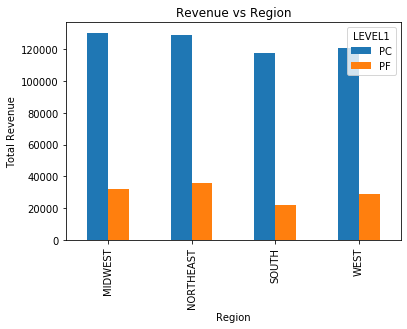

In [59]:
rev_chart = ctotrev_df.plot(kind='bar')
rev_chart.set_xlabel("Region")
rev_chart.set_ylabel("Total Revenue")
plt.title("Revenue vs Region")

Text(0.5, 1.0, 'Asset vs Region')

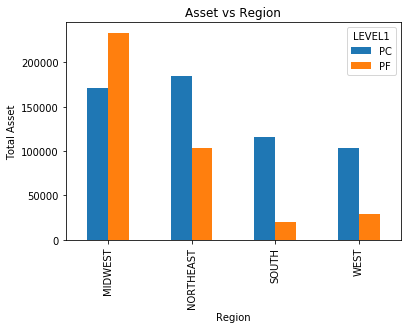

In [60]:
asset_chart = cassets_df.plot(kind='bar')
asset_chart.set_xlabel("Region")
asset_chart.set_ylabel("Total Asset")
plt.title("Asset vs Region")

In [ ]:
# df_medians["CASSETS"],df_medians["CTOTREV"]

In [ ]:
# df_medians.dtypes,df_medians.info()

In [ ]:
# df_medians.rename(columns={'EIN, median':'EIN','CTOTREV, median':'Revenue','CASSETS, median':'Assets'})


In [ ]:
# df_medians.pivot_table(index=['REGION','LEVEL1'],values=['']

In [ ]:
# assets = [171237.5, 233340.5, 162787.0, 103147.5, 116135.0, 20009.0, 103491.0, 29364.5]
# revenues = [130582.0, 32055.0, 128860.0, 35650.5, 117983.0, 21794.0, 120796.0, 28673.0]
# # types = ['PC','PF','PC','PF','PC','PF','PC','PF']
# index = ["MidwestPC","MidwestPF","NortheastPC","NortheastPF","SouthPC","SouthPF","WestPC","WestPF"]

# assets_df = pd.DataFrame(assets, index=index)
# ax = df_medians.plot.bar(rot=0)

In [ ]:
# df_medians["REGION"] = df_medians["REGION"].str.replace('/','')
# df_medians["LEVEL1"] = df_medians["LEVEL1"].str.replace('/','')
# df_medians.dtypes

In [ ]:
# d = {"REGION": ["MIDWEST","NORTHEAST","SOUTH","WEST"],
#      'colors': ['red','black','blue','dog']}

# keys = [k for k in d.keys() for v in d[k]]
# values = [v for k in d.keys() for v in d[k]]
# pd.DataFrame.from_dict({'index': keys, 'values': values})



In [ ]:

# assets_bar=(bethdf.groupby(["REGION","LEVEL1"]).agg({"CASSETS":['median']})).reset_index()
# assets_bar

In [ ]:
# print(df_medians.index)

In [ ]:
# print(bethdf.groupby(["REGION","LEVEL1"]).agg({"CTOTREV":['median']}))
# print(bethdf.groupby(["REGION","LEVEL1"]).agg({"EIN":['count']}))

# Emile's section - Visualization 4

# Scott's section - Visualization 5

# Deanna section - Visualization 6-7

# Katherine's section - Hypothesis Testing

### Create a function to compare four populations (Northeast, South, Midwest, West)
##### Inputs
* Four series (populations)
* Title
* xAxis label

##### Displays
* Histogram
* ANOVA

In [ ]:
# Function comparing four populations
def populationCompare(northeast, south, midwest, west, title, x_label):
    
    # Set the figure size
    plt.figure(figsize=(20,8))
    
    # Create the histogram
    # values
    plt.hist(northeast, 10, density=True, alpha=0.7, color='b', label="Northeast" )    
    plt.hist(south, 10, density=True, alpha=0.7, color='r', label="South" )    
    plt.hist(midwest, 10, density=True, alpha=0.7, color='g', label="Midwest" )    
    plt.hist(west, 10, density=True, alpha=0.7, color='k', label="West" )    
    
    # mean line
    plt.axvline(northeast.mean(), color='b', linestyle='dashed', linewidth=2 )    
    plt.axvline(south.mean(), color='r', linestyle='dashed', linewidth=2 )   
    plt.axvline(midwest.mean(), color='g', linestyle='dashed', linewidth=2 )    
    plt.axvline(west.mean(), color='k', linestyle='dashed', linewidth=2 )   
    
    # labels
    graph_title = title + " by Region"
    plt.title(graph_title, color='k', size=14, weight='bold')
    plt.xlabel(x_label)    
    plt.ylabel("Frequency")    
    plt.legend(loc="best")
    plt.grid(alpha=0.5)
    
    # save the graph
    plt.savefig('./Output/' + graph_title.replace(" ", "") + '.png')
    
    # Perform an ANOVA test assuming populations are not equal
    print('\033[1m' + '\nANOVA test' + '\033[0m')
    print(stats.f_oneway(northeast, south, midwest, west))
    
    # Perforn a Kruskal test assuming population medians are not equal
    print('\033[1m' + '\nKruskal test' + '\033[0m')
    print(stats.kruskal(northeast, south, midwest, west))
        
    return

# Null Hypothesis:  Private foundation assets are equal across regions.

In [ ]:
# Compare the four regions assets for Private Foundations
populationCompare(assets_pf_ne, assets_pf_s, assets_pf_mw, assets_pf_w,
        "Private Foundation Assets", "Assets ($)")

# Null Hypothesis:  Public Charity assets are equal across regions.

In [ ]:
# Compare the four regions assets for Public Charities
populationCompare(assets_pc_ne, assets_pc_s, assets_pc_mw, assets_pc_w,
        "Public Charities Assets", "Assets ($)")

# Null Hypothesis:  Private foundation revenue is equal across regions.

In [ ]:
# Compare the four regions revenue for Private Foundations
populationCompare(rev_pf_ne, rev_pf_s, rev_pf_mw, rev_pf_w,
        "Private Foundation Revenue", "Revenue ($)")

# Null Hypothesis:  Public Charity revenue is equal across regions.

In [ ]:
# Compare the four regions revenue for Public Charities
populationCompare(rev_pc_ne, rev_pc_s, rev_pc_mw, rev_pc_w,
        "Public Charity Revenue", "Revenue ($)")

# Based on results, look at means and medians for populations

In [ ]:
# Create means
asset_pc_means = assets_pc.groupby(["REGION"]).mean()
asset_pf_means = assets_pf.groupby(["REGION"]).mean()
rev_pc_means = rev_pc.groupby(["REGION"]).mean()
rev_pf_means = rev_pf.groupby(["REGION"]).mean()

# Create medians
asset_pc_medians = assets_pc.groupby(["REGION"]).median()
asset_pf_medians = assets_pf.groupby(["REGION"]).median()
rev_pc_medians = rev_pc.groupby(["REGION"]).median()
rev_pf_medians = rev_pf.groupby(["REGION"]).median()

# Compare means first (ANOVA results)

In [ ]:
def plotbyRegion(series1, series2, ylabel, title, series_label1, series_label2):
    
    # Set the figure size
    plt.figure(figsize=(4,4))
    
    # plot the values
    plt.plot(series1, label=series_label1, color='b', marker='o')
    plt.plot(series2, label=series_label2, color='g', marker='o')
    
    # add labels, etc.
    plt.title(title, weight='bold', size=14)
    plt.xlabel("Region")
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)
    plt.legend(loc='best')
    
    # save the graph
    plt.savefig('./Output/' + title.replace(" ", "") + '.png')

    return

In [ ]:
# Plot by region and type the median assets and revenue
plotbyRegion(asset_pc_medians, asset_pf_medians, "Assets ($)", "Median Assets by Region", 
             "Public Charity", "Private Foundation")

plotbyRegion(rev_pc_medians, rev_pf_medians, "Revenue ($)", "Median Revenue by Region", 
             "Public Charity", "Private Foundation")

In [ ]:
# Plot by region and type the mean assets and revenue
plotbyRegion(asset_pc_means, asset_pf_means, "Assets ($)", "Mean Assets by Region", 
             "Public Charity", "Private Foundation")

plotbyRegion(rev_pc_means, rev_pf_means, "Revenue ($)", "Mean Revenue by Region", 
             "Public Charity", "Private Foundation")